In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [4]:
netflix_data = pd.read_csv('netfix_cleaned.csv')

In [248]:
netflix_data.head()

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
0,Mission Majnu,2023,U/A 16+,2h 9m,"In the 1970s, an undercover Indian spy takes o...","['Spy Movies', 'Hindi-Language Movies', 'Bolly...",Suspenseful,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['English,', 'English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
1,Cirkus,2022,U/A 7+,2h 14m,Chaos and comedy take the spotlight when a rin...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Goofy,"['Ranveer Singh', 'Varun Sharma', 'Pooja Hegde...","['English,', 'Hindi']",['Hindi [Original]']
2,Gangubai Kathiawadi,2022,U/A 16+,2h 33m,"Duped and sold to a brothel, a young woman fea...","['Hindi-Language Movies', 'Movies Based on Boo...",Provocative,"['Alia Bhatt', 'Vijay Raaz', 'Seema Pahwa', 'A...","['English,', 'Hindi']","['Hindi [Original],', 'Telugu']"
3,Thunivu,2023,U/A 16+,2h 22m,A major bank heist takes an unnerving turn whe...,"['Crime Movies', 'Action & Adventure']",Exciting,"['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...","['English,', 'Hindi']",['Tamil [Original]']
4,Bhool Bhulaiyaa 2,2022,U/A 13+,2h 21m,"When strangers Reet and Ruhan cross paths, the...","['Hindi-Language Movies', 'Bollywood Movies', ...",Offbeat,"['Tabu', 'Kartik Aaryan', 'Kiara Advani', 'Raj...","['English,', 'Hindi']",['Hindi [Original]']


In [249]:
netflix_data.describe()

,release_year
count,560.000000
mean,2016.521429
std,6.282517
min,1993.000000
25%,2012.000000
50%,2019.000000
75%,2022.000000
max,2023.000000


In [250]:
#finding if there is any nan column
nans_indices = netflix_data.columns[netflix_data.isna().any()].tolist()
print(nans_indices)

['mood']


In [251]:
#drop duplicate entry
netflix_data.drop_duplicates(subset="names", inplace=True)

In [252]:
# to check if there is duplicate entry
netflix_data.shape

(245, 10)

In [253]:
netflix_data.dropna(inplace=True)

In [254]:
# netflix_data['mood'].values
netflix_data['mood'].unique()

array(['Suspenseful', 'Goofy', 'Provocative', 'Exciting', 'Offbeat',
       'Quirky', 'Feel-Good', 'Emotional', 'Heartfelt', 'Ominous',
       'Sentimental', 'Adrenaline Rush', 'Dark', 'Intimate', 'Charming',
       'Violent', 'Gritty', 'Romantic', 'Scary', 'Witty', 'Mind-Bending',
       'Steamy', 'Understated', 'Swoonworthy', 'Bittersweet', 'Inspiring',
       'Raunchy', 'Chilling'], dtype=object)

In [255]:
netflix_data.isnull().sum()

names              0
release_year       0
maturity_rating    0
duration           0
description        0
genre              0
mood               0
cast               0
subtitles          0
audio              0
dtype: int64

<h1>Grouping Movies based on Mood</h1>

[40 18 17 17 16 13 12 11 10  8  7  6  6  5  5  5  5  5  3  3  3  2  2  2
  1  1  1  1]


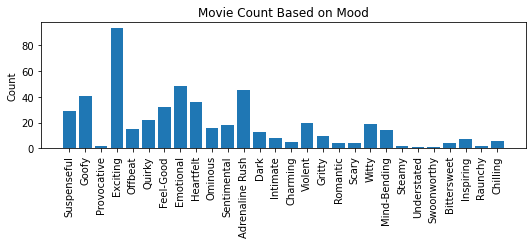

In [256]:
mood = ['Suspenseful', 'Goofy', 'Provocative', 'Exciting', 'Offbeat',
       'Quirky', 'Feel-Good', 'Emotional', 'Heartfelt', 'Ominous',
       'Sentimental', 'Adrenaline Rush', 'Dark', 'Intimate', 'Charming',
       'Violent', 'Gritty', 'Romantic', 'Scary', 'Witty', 'Mind-Bending',
       'Steamy', 'Understated', 'Swoonworthy', 'Bittersweet', 'Inspiring',
       'Raunchy', 'Chilling']

counts = [29, 41, 2, 93, 15, 22,  32, 48, 36, 16,  18, 45, 13, 8, 5, 20, 10, 4, 4, 19, 14, 2, 1, 1, 4, 7,  2, 6]

y = np.array(netflix_data['mood'].value_counts())
print(y)

fig, ax = plt.subplots()
ax.bar(mood,counts)

ax.set_ylabel('Count')
ax.set_title('Movie Count Based on Mood')
plt.xticks(rotation=90)
plt.show()

<h1>Finding Movies Released in 2023</h1>

In [257]:
movies_2023 = netflix_data[netflix_data['release_year'] == 2023]
movies_2023

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
0,Mission Majnu,2023,U/A 16+,2h 9m,"In the 1970s, an undercover Indian spy takes o...","['Spy Movies', 'Hindi-Language Movies', 'Bolly...",Suspenseful,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['English,', 'English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
3,Thunivu,2023,U/A 16+,2h 22m,A major bank heist takes an unnerving turn whe...,"['Crime Movies', 'Action & Adventure']",Exciting,"['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...","['English,', 'Hindi']",['Tamil [Original]']
36,Nanpakal Nerathu Mayakkam,2023,U/A 13+,1h 47m,"In this Malayalam-Tamil drama, an irritable Ja...",['Dramas'],Intimate,"['Mammootty', 'Ramya Suvi', 'Ramya Pandian', '...",['English'],"['Hindi,', 'Malayalam [Original],', 'Telugu']"
175,Call Me Chihiro,2023,U/A 16+,2h 11m,An unapologetic former sex worker starts worki...,['Dramas'],Understated,"['Kasumi Arimura', 'Hana Toyoshima', 'Tetta Sh...","['English,', 'English,', 'French,', 'Japanese']","['English,', 'Japanese - Audio Description,', ..."
179,The Strays,2023,U/A 16+,1h 37m,A woman's meticulously crafted life of privile...,"['Dramas', 'Thriller Movies']",Ominous,"['Ashley Madekwe', 'Jorden Myrie', 'Bukky Bakr...",['English'],"['English - Audio Description,', 'English [Ori..."
181,We Have a Ghost,2023,U/A 13+,2h 7m,After finding a ghost with a murky past haunti...,"['Family Features', 'US Movies', 'Teen Movies'...",Heartfelt,"['David Harbour', 'Anthony Mackie', ""Jahi Di'A...",['English'],"['English - Audio Description,', 'English [Ori..."
193,Dog Gone,2023,U/A 7+,1h 35m,"When his beloved dog goes missing, a young man...","['Family Features', 'Movies Based on Real Life...",Inspiring,"['Rob Lowe', 'Johnny Berchtold', 'Kimberly Wil...",['English'],"['English - Audio Description,', 'English [Ori..."


<h1>Grouping Shows Based on Maturity Rating</h1>

[4 2 1]


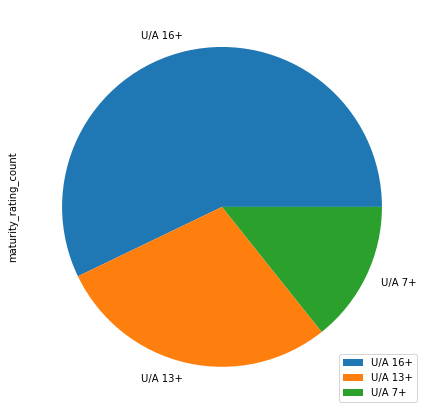

In [258]:
#group the movies based on maturity rating
maturity_cat = ['U/A 16+', 'U/A 13+', 'U/A 7+']
maturity_rating_count = np.array(movies_2023['maturity_rating'].value_counts())
print(maturity_rating_count)

# movies_2023.plot.pie(y=maturity_rating_count,figsize=(5, 5))


df = pd.DataFrame({'maturity_rating_count' : np.array(movies_2023['maturity_rating'].value_counts())},
                   index=['U/A 16+', 'U/A 13+', 'U/A 7+'])

plot = df.plot.pie(y='maturity_rating_count', figsize=(6, 6))

In [259]:
#to get the movie, with its year released and also the casts

netflix_data.iloc[:, [0,1,6]]

,names,release_year,mood
0,Mission Majnu,2023,Suspenseful
1,Cirkus,2022,Goofy
2,Gangubai Kathiawadi,2022,Provocative
3,Thunivu,2023,Exciting
4,Bhool Bhulaiyaa 2,2022,Offbeat
...,...,...,...
538,Taare Zameen Par,2007,Inspiring
539,18 Pages,2022,Emotional
550,Kung-Fu Kings 4: The Challenge of Kung Fu Brot...,2018,Goofy
553,Haseen Dillruba,2021,Offbeat


In [260]:
netflix_data.tail(5)

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
538,Taare Zameen Par,2007,U/A 13+,2h 42m,When daydreamer Ishaan is sent to boarding sch...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Inspiring,"['Aamir Khan', 'Darsheel Safary', 'Tanay Chhed...",['English'],['Hindi [Original]']
539,18 Pages,2022,U/A 13+,2h 17m,When a heartbroken Siddhu stumbles upon a two-...,"['Dramas', 'Romantic Movies']",Emotional,"['Nikhil Siddharth', 'Anupama Parameswaran', '...",['English'],['Telugu [Original]']
550,Kung-Fu Kings 4: The Challenge of Kung Fu Brot...,2018,U/A 7+,1h 26m,"While in Japan, best friends Motu and Patlu ha...","['Hindi-Language Movies', 'Children & Family M...",Goofy,"['Saurav Chakraborty', 'Sanket Mhatre', 'Kamal...",['English'],"['Bangla,', 'Gujarati,', 'Hindi [Original],', ..."
553,Haseen Dillruba,2021,U/A 16+,2h 16m,Under investigation as a suspect in her husban...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Offbeat,"['Taapsee Pannu', 'Vikrant Massey', 'Harshvard...","['English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
559,Kabhi Khushi Kabhie Gham,2001,U/A 13+,3h 29m,Years after his father disowns his adopted bro...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Sentimental,"['Amitabh Bachchan', 'Jaya Bhaduri', 'Shah Ruk...",['English'],['Hindi [Original]']


<h1>Finding Shows casted by Kiara Advani :) </h1>

In [261]:
# Kiara Advani is my fav actress <333 , so i am gg to find which show she casts in

casts = netflix_data['cast']
cast_nparr = np.array(casts)
movie_nparr = np.array(netflix_data['names'])
# cast_nparr
# movie_nparr

new_arr = [movie_nparr,cast_nparr]
movie_list = []
for i in range(len(movie_nparr)):
    if 'Kiara Advani' in new_arr[1][i]:
        movie_list.append(new_arr[0][i])
print(movie_list)


['Bhool Bhulaiyaa 2', 'Kabir Singh', 'Lust Stories', 'Indoo Ki Jawani']


In [268]:
netflix_data_sorted_years = netflix_data.sort_values(by = 'release_year', axis=0, ascending=False)
netflix_data_sorted_years

,names,release_year,maturity_rating,duration,description,genre,mood,cast,subtitles,audio
0,Mission Majnu,2023,U/A 16+,2h 9m,"In the 1970s, an undercover Indian spy takes o...","['Spy Movies', 'Hindi-Language Movies', 'Bolly...",Suspenseful,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['English,', 'English,', 'Hindi']","['English,', 'Hindi - Audio Description,', 'Hi..."
36,Nanpakal Nerathu Mayakkam,2023,U/A 13+,1h 47m,"In this Malayalam-Tamil drama, an irritable Ja...",['Dramas'],Intimate,"['Mammootty', 'Ramya Suvi', 'Ramya Pandian', '...",['English'],"['Hindi,', 'Malayalam [Original],', 'Telugu']"
179,The Strays,2023,U/A 16+,1h 37m,A woman's meticulously crafted life of privile...,"['Dramas', 'Thriller Movies']",Ominous,"['Ashley Madekwe', 'Jorden Myrie', 'Bukky Bakr...",['English'],"['English - Audio Description,', 'English [Ori..."
193,Dog Gone,2023,U/A 7+,1h 35m,"When his beloved dog goes missing, a young man...","['Family Features', 'Movies Based on Real Life...",Inspiring,"['Rob Lowe', 'Johnny Berchtold', 'Kimberly Wil...",['English'],"['English - Audio Description,', 'English [Ori..."
175,Call Me Chihiro,2023,U/A 16+,2h 11m,An unapologetic former sex worker starts worki...,['Dramas'],Understated,"['Kasumi Arimura', 'Hana Toyoshima', 'Tetta Sh...","['English,', 'English,', 'French,', 'Japanese']","['English,', 'Japanese - Audio Description,', ..."
...,...,...,...,...,...,...,...,...,...,...
75,Jurassic Park III,2001,U/A 16+,1h 32m,An aerial tour of an infamous dinosaur island ...,"['Sci-Fi Movies', 'US Movies', 'Movies Based o...",Exciting,"['Sam Neill', 'Téa Leoni', 'William H. Macy', ...","['English,', 'Hindi']","['English - Audio Description,', 'English [Ori..."
104,Shrek,2001,U/A 7+,1h 30m,On a mission to retrieve a princess from a fir...,"['Family Features', 'US Movies', 'Movies Based...",Witty,"['Mike Myers', 'Eddie Murphy', 'Cameron Diaz',...","['English,', 'Hindi']","['English - Audio Description,', 'English [Ori..."
559,Kabhi Khushi Kabhie Gham,2001,U/A 13+,3h 29m,Years after his father disowns his adopted bro...,"['Hindi-Language Movies', 'Bollywood Movies', ...",Sentimental,"['Amitabh Bachchan', 'Jaya Bhaduri', 'Shah Ruk...",['English'],['Hindi [Original]']
291,Final Destination,2000,A,1h 37m,After narrowly avoiding a fatal plane explosio...,"['US Movies', 'Horror Movies']",Scary,"['Devon Sawa', 'Ali Larter', 'Seann William Sc...",['English'],"['English [Original],', 'Hindi']"


In [272]:
year = netflix_data['release_year'].unique()
# print(year)
count_per_year = netflix_data['release_year'].value_counts()
# print(count_per_year)

fig = px.bar(netflix_data, y =count_per_year, x=year, 
             orientation='v', color=year, 
             title='Number of Netflix Shows Released Per Year',
             labels={'x': 'Year', 'y': 'Count per Year'}
            )
fig.show()


<h1>Recommend Shows based on Actress</h1>

In [8]:
#Decide which features to use to do recommendation

reco_df= netflix_data[['names', 'cast', 'genre']]
reco_df.head()

,names,cast,genre
0,Mission Majnu,"['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...","['Spy Movies', 'Hindi-Language Movies', 'Bolly..."
1,Cirkus,"['Ranveer Singh', 'Varun Sharma', 'Pooja Hegde...","['Hindi-Language Movies', 'Bollywood Movies', ..."
2,Gangubai Kathiawadi,"['Alia Bhatt', 'Vijay Raaz', 'Seema Pahwa', 'A...","['Hindi-Language Movies', 'Movies Based on Boo..."
3,Thunivu,"['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...","['Crime Movies', 'Action & Adventure']"
4,Bhool Bhulaiyaa 2,"['Tabu', 'Kartik Aaryan', 'Kiara Advani', 'Raj...","['Hindi-Language Movies', 'Bollywood Movies', ..."


In [9]:
#Suggest a Similar Content based on certain actress
reco_df['cast'].head()

0    ['Sidharth Malhotra', 'Rashmika Mandanna', 'Pa...
1    ['Ranveer Singh', 'Varun Sharma', 'Pooja Hegde...
2    ['Alia Bhatt', 'Vijay Raaz', 'Seema Pahwa', 'A...
3    ['Ajith Kumar', 'Manju Warrier', 'Samuthirakan...
4    ['Tabu', 'Kartik Aaryan', 'Kiara Advani', 'Raj...
Name: cast, dtype: object

In [10]:
# for index, row in reco_df.iterrows():
#     print(row['cast'])
#     for cast in row['cast']:
#         cast = cast.lower().replace(' ','')

reco_df['cast'] = reco_df['cast'].apply(lambda x: ','.join(x).lower().replace(' ',''))


<ipython-input-10-03f6cb13b6ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['cast'] = reco_df['cast'].apply(lambda x: ','.join(x).lower().replace(' ',''))


In [11]:
reco_df['cast'].head()

0    [,',s,i,d,h,a,r,t,h,,m,a,l,h,o,t,r,a,',,,,',r,...
1    [,',r,a,n,v,e,e,r,,s,i,n,g,h,',,,,',v,a,r,u,n,...
2    [,',a,l,i,a,,b,h,a,t,t,',,,,',v,i,j,a,y,,r,a,a...
3    [,',a,j,i,t,h,,k,u,m,a,r,',,,,',m,a,n,j,u,,w,a...
4    [,',t,a,b,u,',,,,',k,a,r,t,i,k,,a,a,r,y,a,n,',...
Name: cast, dtype: object